In [1]:
# ! pip install colorcorrect

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import torch
from pathlib import Path
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models
import random

In [2]:
import cv2
from PIL import Image
from colorcorrect.util import from_pil, to_pil
import colorcorrect.algorithm as cca

import matplotlib.pyplot as plt

In [3]:
train_path = Path("/home/ubuntu/data/sandwich/")/"train-315"

In [4]:
test_path = Path("/home/ubuntu/data/sandwich/")/"test-315"

# Grey World

In [6]:
new_train_path = Path("/home/ubuntu/data/sandwich/")/"gw-train-315"

In [7]:
new_train_path.mkdir(exist_ok=True)

In [8]:
new_test_path = Path("/home/ubuntu/data/sandwich/")/"gw-test-315"

In [9]:
new_test_path.mkdir(exist_ok=True)

In [10]:
def grey_world_image(img_path):
    img = Image.open(img_path)
    gw_img = to_pil(cca.grey_world(from_pil(img)))
    return gw_img

In [11]:
def grey_world_all_images(new_path, org_path):
    paths = [x for x in list(org_path.iterdir()) if x.is_dir()]
    for p in paths:
        label = p.parts[-1]
        (new_path/label).mkdir(exist_ok=True)
        files = list((org_path/label).iterdir())
        for f in files:
            f_name = f.parts[-1]
            gw_img = grey_world_image(f)
            gw_img.save(str(new_path/label/f_name))

In [12]:
# grey_world_all_images(new_train_path, train_path)

In [13]:
# grey_world_all_images(new_test_path, test_path)

# Histogram Equalization

In [5]:
new_train_path = Path("/home/ubuntu/data/sandwich/")/"he-train-315"

In [6]:
new_train_path.mkdir(exist_ok=True)

In [7]:
new_test_path = Path("/home/ubuntu/data/sandwich/")/"he-test-315"

In [8]:
new_test_path.mkdir(exist_ok=True)

In [9]:
# https://stackoverflow.com/questions/42651595/histogram-equalization-python-for-colored-image
def histogram_equalize_image(img_path):
    img = cv2.imread(str(img_path))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_y_cr_cb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    y, cr, cb = cv2.split(img_y_cr_cb)
    y_eq = cv2.equalizeHist(y)
    img_y_cr_cb_eq = cv2.merge((y_eq, cr, cb))
    img_rgb_eq = cv2.cvtColor(img_y_cr_cb_eq, cv2.COLOR_YCR_CB2BGR)
    return cv2.cvtColor(img_rgb_eq, cv2.COLOR_RGB2BGR)

In [10]:
def histogram_equalize_all_images(new_path, org_path):
    paths = [x for x in list(org_path.iterdir()) if x.is_dir()]
    for p in paths:
        label = p.parts[-1]
        (new_path/label).mkdir(exist_ok=True)
        files = list((org_path/label).iterdir())
        for f in files:
            f_name = f.parts[-1]
            he_img = histogram_equalize_image(f)
            cv2.imwrite(str(new_path/label/f_name), he_img)

In [11]:
# histogram_equalize_all_images(new_train_path, train_path)

In [12]:
# histogram_equalize_all_images(new_test_path, test_path)

# Grey World then Histogram Equalization

In [22]:
train_path = Path("/home/ubuntu/data/sandwich/")/"gw-train-315"

In [23]:
test_path = Path("/home/ubuntu/data/sandwich/")/"gw-test-315"

In [24]:
new_train_path = Path("/home/ubuntu/data/sandwich/")/"gwhe-train-315"

In [25]:
new_train_path.mkdir(exist_ok=True)

In [26]:
new_test_path = Path("/home/ubuntu/data/sandwich/")/"gwhe-test-315"

In [27]:
new_test_path.mkdir(exist_ok=True)

In [28]:
def histogram_equalize_all_images(new_path, org_path):
    paths = [x for x in list(org_path.iterdir()) if x.is_dir()]
    for p in paths:
        label = p.parts[-1]
        (new_path/label).mkdir(exist_ok=True)
        files = list((org_path/label).iterdir())
        for f in files:
            f_name = f.parts[-1]
            he_img = histogram_equalize_image(f)
            cv2.imwrite(str(new_path/label/f_name), he_img)

In [29]:
# histogram_equalize_all_images(new_train_path, train_path)

In [30]:
# histogram_equalize_all_images(new_test_path, test_path)

# Test with a single image

In [25]:
img_path = Path("/home/ubuntu/data/sandwich/train-315/club_sandwich/1017761.jpg")

In [12]:
img = cv2.imread(str(img_path))

In [13]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

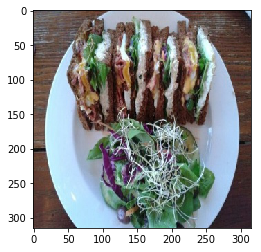

In [21]:
plt.imshow(img)